In [5]:
using ITensors
using PyPlot

In [18]:
# build Hamiltonian of AKLT model
function H_XXZ(N, D, J)
    
    # create N spin-1 degrees of freedom 
    sites = siteinds("S=1", N)
    
    # init MPO 
    ampo = AutoMPO()
    
    for j = 1 : N - 1
        # usual Heisenberg term
        ampo += J, "Sx", j, "Sx", j + 1
        ampo += J, "Sy", j, "Sy", j + 1
        ampo += J, "Sz", j, "Sz", j + 1
        
        # biquadratic terms of each component
        ampo += D, "Sz", j, "Sz", j    
    end
    
    # build final MPO 
    H = MPO(ampo, sites)
    
    return sites, H
end 

# run DMRG calculation and return observer (energy truncation to speed up simulations)
function run_XXZ(N, D, J , sweeps)
    
    # build Hamiltonian
    sites, H = H_XXZ(N, D, J)
    
    # build random initial state 
    psi0 = randomMPS(sites, 1)
    
    # run DMRG calculation for ground state
    obs = DMRGObserver(energy_tol = 1E-8)
    E1, psi1 = dmrg(H, psi0, sweeps; observer = obs)

    return obs, E1, psi1
end

run_XXZ (generic function with 1 method)

In [19]:
# set up system sizes and field strength 
Ns = [10]
U, J = 1, 1

# set up sweeps
N_sweeps = 20
sweeps   = Sweeps(N_sweeps)
maxdim!(sweeps, 80)
cutoff!(sweeps, 1e-8)

# set up buffers to store results
E  = []
Sz = []
Sx = []

for N in Ns
    # run DMRG calculation and obtain observer 
    obs, E1, psi1 = run_XXZ(N, D, J, sweeps)
    # store results
    push!(E,  energies(obs)[end] / N)
    println(obs, E1, psi1)
end

After sweep 1 energy=-12.809526552555 maxlinkdim=9 maxerr=1.77E-16 time=0.009
After sweep 2 energy=-12.878336492790 maxlinkdim=49 maxerr=9.70E-09 time=0.086
After sweep 3 energy=-12.894172214803 maxlinkdim=48 maxerr=9.87E-09 time=0.157
After sweep 4 energy=-12.894555586472 maxlinkdim=46 maxerr=8.96E-09 time=0.130
After sweep 5 energy=-12.894559924877 maxlinkdim=45 maxerr=8.69E-09 time=0.131
After sweep 6 energy=-12.894559952774 maxlinkdim=45 maxerr=8.30E-09 time=0.127
After sweep 7 energy=-12.894559952692 maxlinkdim=45 maxerr=8.19E-09 time=0.124
Energy difference less than 1.0e-8, stopping DMRG
DMRGObserver(String[], Index[], Dict{String, Vector{Vector{Float64}}}(), [-12.80952655255479, -12.878336492789588, -12.894172214802692, -12.894555586472293, -12.894559924876555, -12.894559952774166, -12.894559952692434], [1.7684299173722466e-16, 9.265563966632214e-9, 9.870611157300013e-9, 8.25978424190325e-9, 8.690312334535638e-9, 8.190273368917521e-9, 8.18844075809932e-9], 1.0e-8, 2)-12.8945599

In [23]:

# set up system size and couplings
N = 10
J = 1
Ds = -1:0.05:2

# set up sweeps
N_sweeps = 50
sweeps   = Sweeps(N_sweeps)
maxdim!(sweeps, 80)
cutoff!(sweeps, 1e-5)

# set up buffer for results 
Ss = []

for D in Ds
    # build Hamiltonian
    sites, H = H_XXZ(N, D, J)

    # build random initial state 
    psi0 = randomMPS(sites, 1)

    # build observer
    obs = DMRGObserver(energy_tol = 1E-8)

    # run DMRG calculation
    E, psi = dmrg(H, psi0, sweeps; observer = obs)

    # set bond for which we want to do the SVD 
    b = floor(Int64, N / 2)

    # gauge psi to bond b 
    orthogonalize!(psi, b)

    # perform SVD 
    U, S, V = svd(psi[b], (linkind(psi, b - 1), siteind(psi, b)))
    
    # compute s
    s = 0.0 

    for i in 1 : size(S, 1)
        s += -S[i, i]^2 * log(S[i, i]^2)
    end
    
    push!(Ss, s)
end

After sweep 1 energy=-20.016981322333 maxlinkdim=9 maxerr=6.69E-06 time=0.009
After sweep 2 energy=-20.153402733797 maxlinkdim=8 maxerr=9.44E-06 time=0.023
After sweep 3 energy=-20.153578073944 maxlinkdim=8 maxerr=9.27E-06 time=0.026
After sweep 4 energy=-20.153578586373 maxlinkdim=8 maxerr=9.27E-06 time=0.012
After sweep 5 energy=-20.153578587622 maxlinkdim=8 maxerr=9.27E-06 time=0.013
Energy difference less than 1.0e-8, stopping DMRG
After sweep 1 energy=-19.702610657448 maxlinkdim=9 maxerr=9.95E-06 time=0.012
After sweep 2 energy=-19.751328743626 maxlinkdim=8 maxerr=8.65E-06 time=0.016
After sweep 3 energy=-19.751394874398 maxlinkdim=8 maxerr=8.28E-06 time=0.015
After sweep 4 energy=-19.751395248926 maxlinkdim=8 maxerr=8.26E-06 time=0.018
After sweep 5 energy=-19.751395250068 maxlinkdim=8 maxerr=8.26E-06 time=0.026
Energy difference less than 1.0e-8, stopping DMRG
After sweep 1 energy=-19.325533909429 maxlinkdim=9 maxerr=8.10E-06 time=0.010
After sweep 2 energy=-19.351481898628 maxl

After sweep 10 energy=-17.784396308966 maxlinkdim=13 maxerr=9.89E-06 time=0.048
After sweep 11 energy=-17.784551767356 maxlinkdim=13 maxerr=9.18E-06 time=0.050
After sweep 12 energy=-17.784639510465 maxlinkdim=13 maxerr=9.03E-06 time=0.049
After sweep 13 energy=-17.784692655014 maxlinkdim=13 maxerr=8.98E-06 time=0.049
After sweep 14 energy=-17.784726985854 maxlinkdim=13 maxerr=9.02E-06 time=0.041
After sweep 15 energy=-17.784749756815 maxlinkdim=13 maxerr=9.08E-06 time=0.051
After sweep 16 energy=-17.784763684922 maxlinkdim=13 maxerr=9.15E-06 time=0.041
After sweep 17 energy=-17.784769447330 maxlinkdim=13 maxerr=9.23E-06 time=0.032
After sweep 18 energy=-17.784771022986 maxlinkdim=13 maxerr=9.27E-06 time=0.035
After sweep 19 energy=-17.784771587251 maxlinkdim=13 maxerr=9.28E-06 time=0.035
After sweep 20 energy=-17.784771867724 maxlinkdim=13 maxerr=9.30E-06 time=0.032
After sweep 21 energy=-17.784772027053 maxlinkdim=13 maxerr=9.30E-06 time=0.031
After sweep 22 energy=-17.784772124533 m

After sweep 8 energy=-16.247784121660 maxlinkdim=16 maxerr=9.93E-06 time=0.044
After sweep 9 energy=-16.255368555598 maxlinkdim=15 maxerr=8.97E-06 time=0.035
After sweep 10 energy=-16.257742201885 maxlinkdim=12 maxerr=9.51E-06 time=0.022
After sweep 11 energy=-16.261917869465 maxlinkdim=14 maxerr=7.88E-06 time=0.041
After sweep 12 energy=-16.267060622440 maxlinkdim=15 maxerr=9.58E-06 time=0.031
After sweep 13 energy=-16.269583797754 maxlinkdim=16 maxerr=9.75E-06 time=0.041
After sweep 14 energy=-16.270086103343 maxlinkdim=15 maxerr=9.45E-06 time=0.031
After sweep 15 energy=-16.270162723411 maxlinkdim=15 maxerr=8.92E-06 time=0.039
After sweep 16 energy=-16.270194017583 maxlinkdim=15 maxerr=8.91E-06 time=0.040
After sweep 17 energy=-16.270206865422 maxlinkdim=15 maxerr=8.95E-06 time=0.048
After sweep 18 energy=-16.270209882746 maxlinkdim=15 maxerr=9.00E-06 time=0.038
After sweep 19 energy=-16.270210352374 maxlinkdim=15 maxerr=9.02E-06 time=0.036
After sweep 20 energy=-16.270210491413 max

After sweep 5 energy=-13.510142312202 maxlinkdim=16 maxerr=8.71E-06 time=0.066
After sweep 6 energy=-13.510142852335 maxlinkdim=16 maxerr=8.48E-06 time=0.050
After sweep 7 energy=-13.510142867016 maxlinkdim=16 maxerr=8.48E-06 time=0.063
After sweep 8 energy=-13.510142868401 maxlinkdim=16 maxerr=8.48E-06 time=0.052
Energy difference less than 1.0e-8, stopping DMRG
After sweep 1 energy=-13.092320142194 maxlinkdim=9 maxerr=9.18E-06 time=0.014
After sweep 2 energy=-13.167335769635 maxlinkdim=17 maxerr=9.15E-06 time=0.034
After sweep 3 energy=-13.197524322225 maxlinkdim=19 maxerr=9.81E-06 time=0.039
After sweep 4 energy=-13.198258545530 maxlinkdim=16 maxerr=9.69E-06 time=0.049
After sweep 5 energy=-13.198274050808 maxlinkdim=16 maxerr=8.79E-06 time=0.048
After sweep 6 energy=-13.198274232001 maxlinkdim=16 maxerr=8.68E-06 time=0.035
After sweep 7 energy=-13.198274237176 maxlinkdim=16 maxerr=8.68E-06 time=0.044
Energy difference less than 1.0e-8, stopping DMRG
After sweep 1 energy=-12.7973411

After sweep 10 energy=-10.238594785859 maxlinkdim=16 maxerr=9.45E-06 time=0.038
After sweep 11 energy=-10.238594794249 maxlinkdim=16 maxerr=9.45E-06 time=0.041
Energy difference less than 1.0e-8, stopping DMRG
After sweep 1 energy=-9.785144429740 maxlinkdim=9 maxerr=8.92E-06 time=0.013
After sweep 2 energy=-9.950064251686 maxlinkdim=17 maxerr=9.43E-06 time=0.032
After sweep 3 energy=-10.004086270340 maxlinkdim=19 maxerr=9.62E-06 time=0.044
After sweep 4 energy=-10.005746891902 maxlinkdim=16 maxerr=9.28E-06 time=0.037
After sweep 5 energy=-10.005746569240 maxlinkdim=15 maxerr=9.29E-06 time=0.037
After sweep 6 energy=-10.005746979602 maxlinkdim=15 maxerr=9.27E-06 time=0.046
After sweep 7 energy=-10.005747071447 maxlinkdim=15 maxerr=9.27E-06 time=0.035
After sweep 8 energy=-10.005747108091 maxlinkdim=15 maxerr=9.28E-06 time=0.043
After sweep 9 energy=-10.005747125751 maxlinkdim=15 maxerr=9.28E-06 time=0.039
After sweep 10 energy=-10.005747135059 maxlinkdim=15 maxerr=9.28E-06 time=0.043
En

After sweep 2 energy=-7.371599312861 maxlinkdim=17 maxerr=9.95E-06 time=0.034
After sweep 3 energy=-7.594548772569 maxlinkdim=14 maxerr=9.96E-06 time=0.044
After sweep 4 energy=-7.596172832283 maxlinkdim=13 maxerr=9.73E-06 time=0.038
After sweep 5 energy=-7.596178289604 maxlinkdim=13 maxerr=8.93E-06 time=0.033
After sweep 6 energy=-7.596178306635 maxlinkdim=13 maxerr=8.92E-06 time=0.035
After sweep 7 energy=-7.596178306727 maxlinkdim=13 maxerr=8.92E-06 time=0.042
Energy difference less than 1.0e-8, stopping DMRG
After sweep 1 energy=-7.167473943319 maxlinkdim=9 maxerr=8.75E-06 time=0.013
After sweep 2 energy=-7.423175724860 maxlinkdim=14 maxerr=9.99E-06 time=0.032
After sweep 3 energy=-7.425745686232 maxlinkdim=13 maxerr=9.42E-06 time=0.029
After sweep 4 energy=-7.425755420142 maxlinkdim=13 maxerr=8.20E-06 time=0.040
After sweep 5 energy=-7.425755445335 maxlinkdim=13 maxerr=8.15E-06 time=0.032
After sweep 6 energy=-7.425755445540 maxlinkdim=13 maxerr=8.15E-06 time=0.034
Energy differen

After sweep 2 energy=-5.831653514759 maxlinkdim=11 maxerr=9.71E-06 time=0.027
After sweep 3 energy=-5.831775897625 maxlinkdim=11 maxerr=9.82E-06 time=0.025
After sweep 4 energy=-5.831776867087 maxlinkdim=11 maxerr=9.96E-06 time=0.025
After sweep 5 energy=-5.831776874588 maxlinkdim=11 maxerr=9.97E-06 time=0.031
Energy difference less than 1.0e-8, stopping DMRG
After sweep 1 energy=-5.180841710374 maxlinkdim=9 maxerr=6.88E-06 time=0.013
After sweep 2 energy=-5.697048073012 maxlinkdim=13 maxerr=9.99E-06 time=0.037
After sweep 3 energy=-5.710584198508 maxlinkdim=11 maxerr=9.49E-06 time=0.033
After sweep 4 energy=-5.710565471287 maxlinkdim=10 maxerr=8.75E-06 time=0.026
After sweep 5 energy=-5.710565534079 maxlinkdim=10 maxerr=8.61E-06 time=0.030
After sweep 6 energy=-5.710565535259 maxlinkdim=10 maxerr=8.61E-06 time=0.028
Energy difference less than 1.0e-8, stopping DMRG
After sweep 1 energy=-5.496071601615 maxlinkdim=9 maxerr=8.39E-06 time=0.013
After sweep 2 energy=-5.592717518856 maxlink

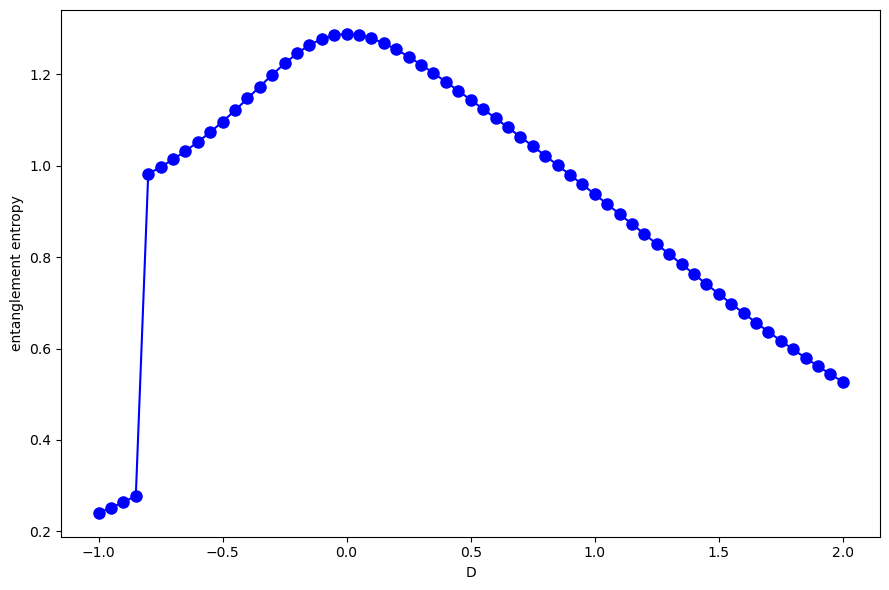

In [24]:
# plot data 
# pygui(true)
fig = figure(figsize = (9, 6))

xlabel("D")
ylabel("entanglement entropy")

plot(Ds, Ss, marker = "o", markersize = 8.0, color = "blue")

tight_layout()

# fit = curve_fit(model, log.(Ns), Ss, [0.5, 0.5])
# c   = 6.0 * coef(fit)[1]

# println("Central charge is $(c).")
show()